* **DOMAIN:** Telecom
* **CONTEXT:** A telecom company wants to use their historical customer data and leverage machine learning to predict behaviour in an attempt
to retain customers. The end goal is to develop focused customer retention programs.

<br>

* **DATA DESCRIPTION:** Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The
data set includes information about:
    - Customers who left within the last month – the column is called Churn
    - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and
streaming TV and movies
    - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    - Demographic info about customers – gender, age range, and if they have partners and dependents

<br>



* **PROJECT OBJECTIVE:** The objective, as a data scientist hired by the telecom company, is to build a model that will help to identify the
potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer
churn and will increase the focus on strategising customer retention.

In [91]:
#IMPORTING PACKAGES
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

**STEPS AND TASK:**
<br>**1. Data Understanding & Exploration:**

**A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.**

In [92]:
tele_churn1 = pd.read_csv(r'TelcomCustomer-Churn_1.csv')

**B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.**

In [93]:
tele_churn2 = pd.read_csv(r'TelcomCustomer-Churn_2.csv')

**C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame**

By default the merge happens as inner and nothing specific is given in the question so we will assuame the join to be inner

In [94]:
tele_churn = pd.merge(tele_churn1, tele_churn2, how='inner', left_on='customerID', right_on='customerID')

**D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.**

In [95]:
col_in_tele_churn1 = tele_churn1.columns.to_list()
col_in_tele_churn2 = tele_churn2.columns.to_list()
all_cols = col_in_tele_churn1 + col_in_tele_churn2 #this will remove any duplicate column/s

if all_cols.sort() == tele_churn.columns.to_list().sort():
    print("Matched")
else: print("Not Matched")

Matched


**2. Data Cleaning & Analysis:**

**A. Impute missing/unexpected values in the DataFrame.**

In [96]:
tele_churn.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6006,1360-RCYRT,Male,0,Yes,Yes,23,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),30.35,678.75,No
4438,2263-SFSQZ,Male,0,Yes,Yes,51,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.95,1222.25,No
6997,2523-EWWZL,Female,0,Yes,No,27,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.10,2093.4,No
2756,5624-BQSSA,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.95,20.95,Yes
5317,1213-NGCUN,Female,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),49.65,267.35,Yes


In [97]:
tele_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Some datatype aren't right

In [98]:
tele_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

So there are no null values

In [99]:
for cols in tele_churn.columns:
    print(tele_churn[cols].value_counts(), '\n ************************************** \n')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64 
 ************************************** 

gender
Male      3555
Female    3488
Name: count, dtype: int64 
 ************************************** 

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64 
 ************************************** 

Partner
No     3641
Yes    3402
Name: count, dtype: int64 
 ************************************** 

Dependents
No     4933
Yes    2110
Name: count, dtype: int64 
 ************************************** 

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64 
 ************************************** 

PhoneService
Yes    6361
No      682
Name: count, dtype: int64 
 ************************************** 

MultipleLine

There is also no unexpected values in any of the columns(Hard to tell about the columns with too many value counts but we will confirm the same at later stage)

We found when converting the numerical col 'TotalCharges' to float type that there is infact rubbish entry ' ' in them. We will take care of them here. We assume that it can be in multiple other columns so we will replace all ' ' with None.

In [100]:
tele_churn.replace({' ':None}, inplace=True)

**B. Make sure all the variables with continuous values are of ‘Float’ type.**

In [101]:
continous_var = ['MonthlyCharges', 'TotalCharges'] # not adding tenure in this as it can be very subjective to the end result
for col in continous_var:
    tele_churn[col] = tele_churn[col].astype(dtype='float')

In [102]:
#checking for null values
tele_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [103]:
#filling null values with mean
tele_churn['TotalCharges'].fillna(tele_churn['TotalCharges'].mean(), inplace=True)

C:\Users\charansakki\AppData\Local\Temp\ipykernel_29124\139639121.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tele_churn['TotalCharges'].fillna(tele_churn['TotalCharges'].mean(), inplace=True)


In [104]:
#checking for null values
tele_churn.isnull().sum().sum()

0

**C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage
distribution in the pie-chart.**

In [105]:
#fixing data type
tele_churn['SeniorCitizen'] = tele_churn['SeniorCitizen'].astype(dtype='object')

#cutomer id is the primary key and won't be useful in model building there fore dropping it
tele_churn.drop('customerID', axis=1, inplace=True)

In [106]:
#function to create pie chart using dataframe
def create_pie_char(df):
    obj_cols = []
    for cols in df.columns:
        if df[cols].dtype == 'O':
            obj_cols.append(cols)
    df = df[obj_cols]
    fig, ax = pyplot.subplots(6, 3, figsize=(15,20))
    for variable, subplot in zip(df.columns, ax.flat):
        subplot.pie(df[variable].value_counts(normalize=True),labels = df[variable].value_counts(normalize=True).reset_index().iloc[:,0], autopct='%1.1f%%');
        subplot.title.set_text(variable)
        pyplot.tight_layout()
    
    for ax in ax.flat[df.shape[1]:]:
        ax.remove()
    return None

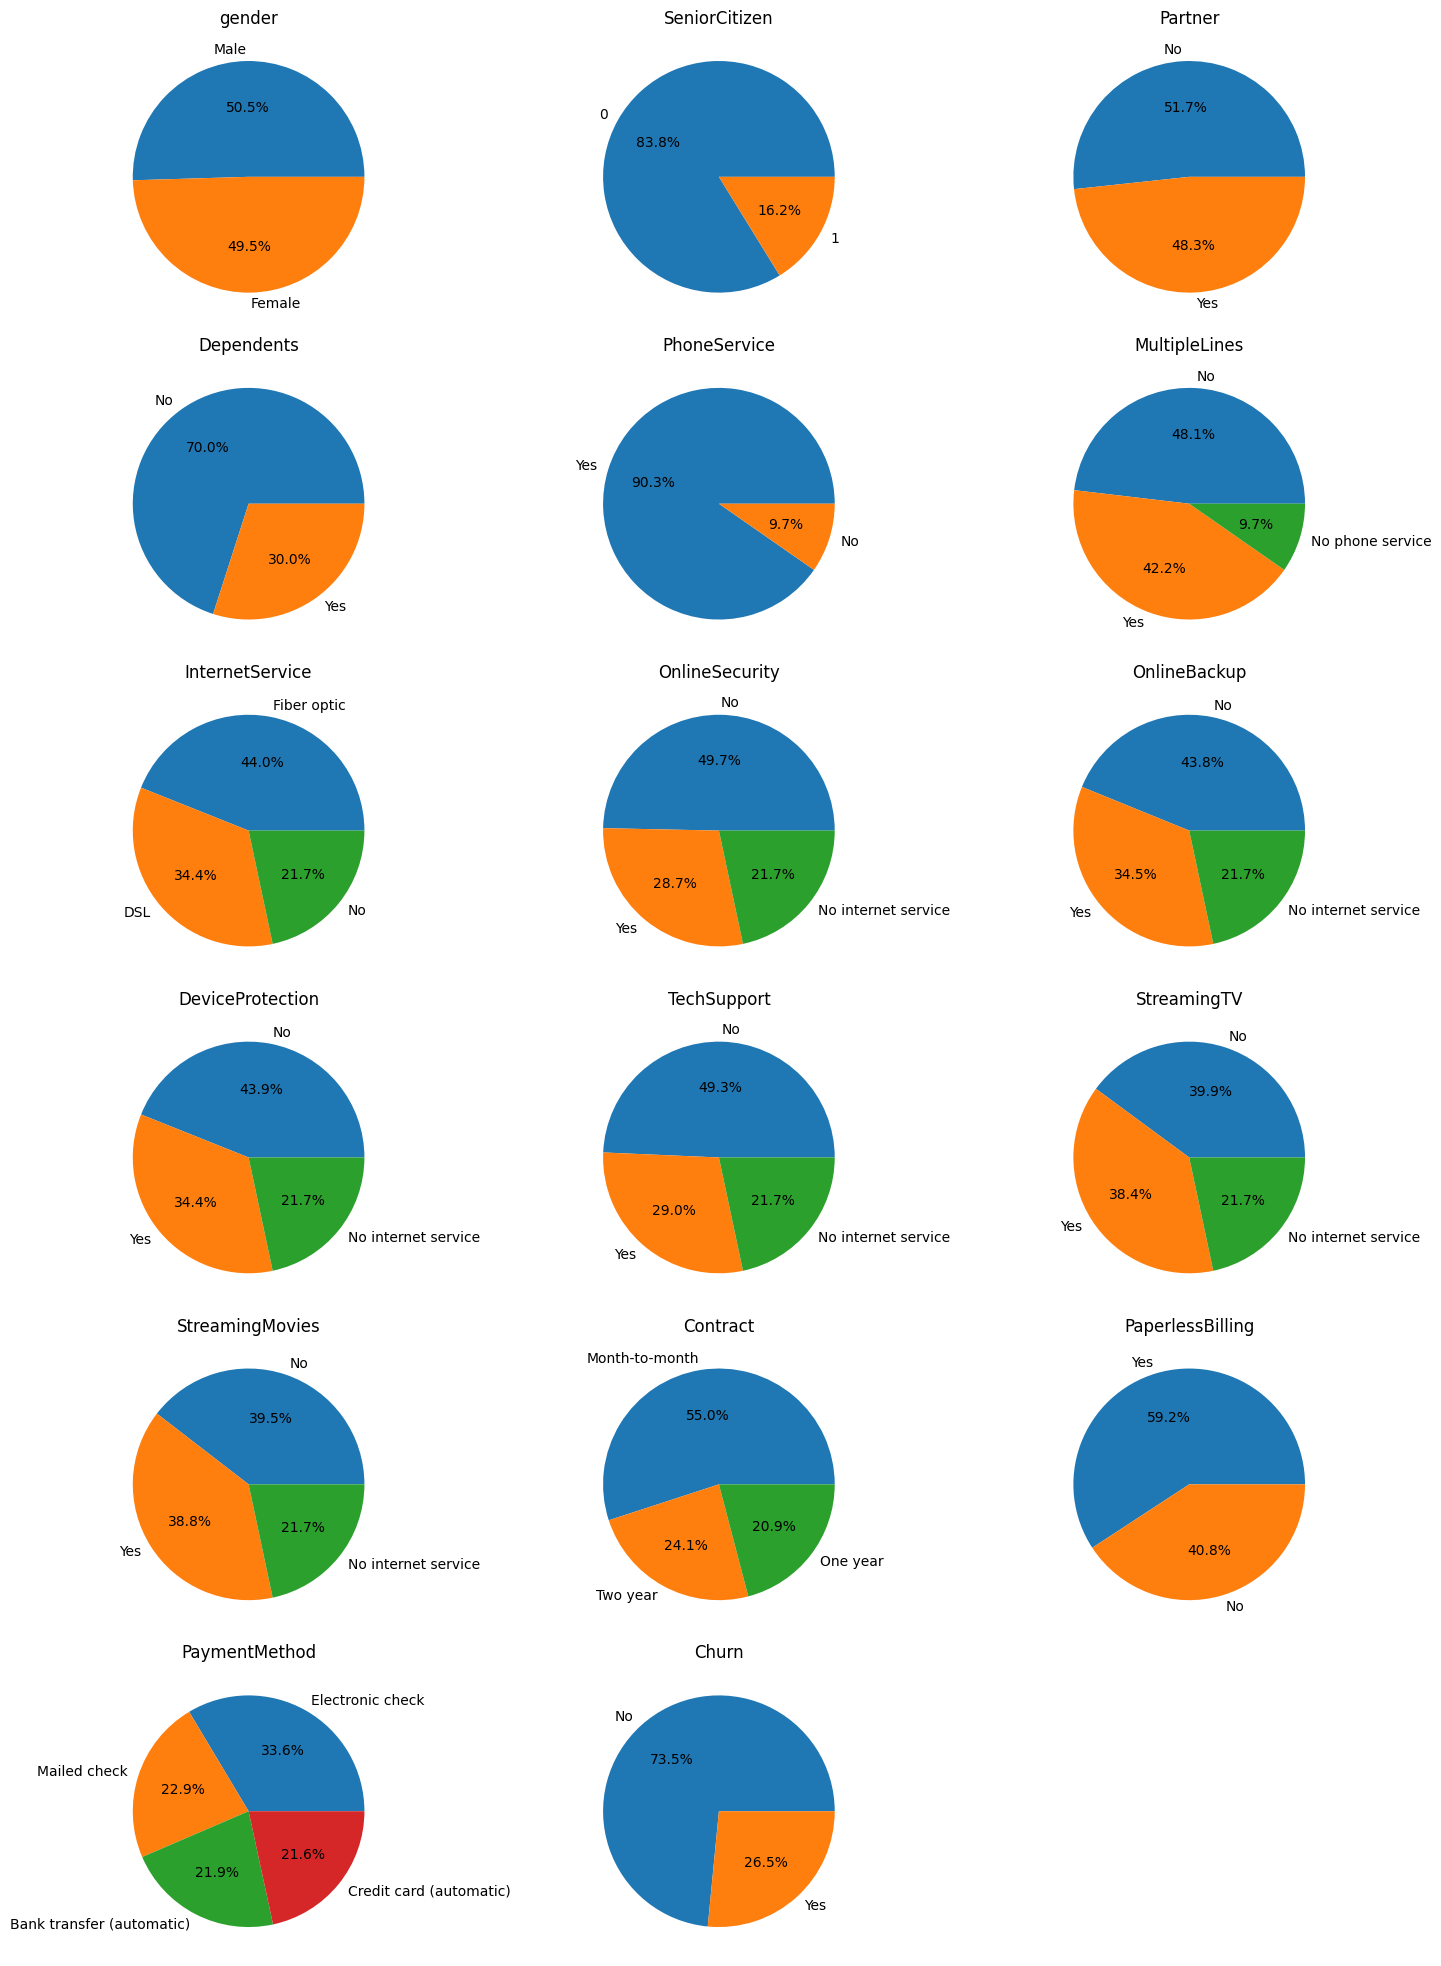

In [107]:
#function usage
create_pie_char(tele_churn)

**D. Share insights for Q2.c.**

* We have a diverse group if we look gender specifically i.e. Male and Female are equal
* We have larger group (~84%) of younger people and only 15% senior citizen
* Almost people who are partners and who are single are equal.
* Around 700% popluation is independent and need no one to support them.
* 90% of the people have opted for Phone Service
* Most people prefer not to have multiple line and almost 42% who have them.
* It's a good thing that around ~78% people have internet connection and 44% are on latest fiber technology
* This is a concerning area as most ~50% of the population who has internet connectivity doesn't have a proper security.
* Again a concerning area where people whoo have internet connection doesn't have backup in place(38%)
* Most of the people doesn't want / doesn't have a Device protection(44%)
* Tech Support isn't enabled for ~50% of the total base. This is a opportunity area.
* Almost a tie for people ahveing a internet connection opting for Streaming TV, Streaming Movie service.
* Our most cutomer are attached to us with a Monthly subscription. Definitely an opportunity area.
* ~60% people have opted for paperless billing, but a opportunity area for company's carbon emission
* People prefer electronic check as a payment method and for the rest payment method sample is distributed equally.
* Overall company is doing goog and thus we have ~70% customer who wants to stay with the company.

**E. Encode all the appropriate Categorical features with the best suitable approach.**

In [108]:
replaceStruct = {
                "Partner":     {"No": 0, "Yes": 1 },
                "Dependents":     {"No": 0, "Yes": 1 },
                "PhoneService":     {"No": 0, "Yes": 1 },
                "PaperlessBilling":     {"No": 0, "Yes": 1 },
                "Churn":     {"No": 0, "Yes": 1 }
                                }
oneHotCols=["gender","MultipleLines","InternetService","OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]

In [109]:
tele_churn_temp = tele_churn

In [110]:
tele_churn_temp=tele_churn_temp.replace(replaceStruct)
tele_churn_temp=pd.get_dummies(tele_churn_temp, columns=oneHotCols)
tele_churn_temp.head(10)

C:\Users\charansakki\AppData\Local\Temp\ipykernel_29124\974176137.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tele_churn_temp=tele_churn_temp.replace(replaceStruct)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,True,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,False,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,False,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,False,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,True,...,True,False,False,True,False,False,False,False,True,False
5,0,0,0,8,1,1,99.65,820.50,1,True,...,False,False,True,True,False,False,False,False,True,False
6,0,0,1,22,1,1,89.10,1949.40,0,False,...,True,False,False,True,False,False,False,True,False,False
7,0,0,0,10,0,0,29.75,301.90,0,True,...,True,False,False,True,False,False,False,False,False,True
8,0,1,0,28,1,1,104.80,3046.05,1,True,...,False,False,True,True,False,False,False,False,True,False
9,0,0,1,62,1,0,56.15,3487.95,0,False,...,True,False,False,False,True,False,True,False,False,False


**F. Split the data into 80% train and 20% test.**

In [111]:
x = tele_churn_temp.drop("Churn", axis=1)
y = tele_churn_temp['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=1)

**G. Normalize/Standardize the data with the best suitable approach.**

In [112]:
# numerical features
num_cols = ['MonthlyCharges','TotalCharges','tenure']

In [113]:
x[num_cols].describe()

,MonthlyCharges,TotalCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2283.300441,32.371149
std,30.090047,2265.000258,24.559481
min,18.250000,18.800000,0.000000
25%,35.500000,402.225000,9.000000
50%,70.350000,1400.550000,29.000000
75%,89.850000,3786.600000,55.000000
max,118.750000,8684.800000,72.000000


We see a huge varitation in TotalCharges, but we will scale all the columns and see the result and make changes accordingly

In [114]:
# copy of datasets
x_train_stand = x_train.copy()
x_test_stand = x_test.copy()

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(x_train_stand[[i]])
    
    # transform the training data column
    x_train_stand[i] = scale.transform(x_train_stand[[i]])
    
    # transform the testing data column
    x_test_stand[i] = scale.transform(x_test_stand[[i]])

In [115]:
x_train_stand[num_cols].describe()

,MonthlyCharges,TotalCharges,tenure
count,5.634000e+03,5.634000e+03,5.634000e+03
mean,-4.068847e-16,-8.071483e-17,-3.089865e-17
std,1.000089e+00,1.000089e+00,1.000089e+00
min,-1.545699e+00,-9.988000e-01,-1.314622e+00
25%,-9.759755e-01,-8.336592e-01,-9.480685e-01
50%,1.858951e-01,-3.901671e-01,-1.335051e-01
75%,8.328552e-01,6.653911e-01,9.254272e-01
max,1.789592e+00,2.827952e+00,1.617806e+00


**3. Model building and performance improvement :**

In [116]:
model_name = []
score_train = []
score_test = []
accuracy = []
error_rate = []
precision = []
recall =[]
f1 = []
r2 = []
rmse = []
rmsle = []


def model_comparison_metrics(model_name_str, ml_model, y_test, y_pred, x_train, x_test) :
    
    model_name.append(model_name_str)
    score_train.append(ml_model.score(x_train, y_train))
    score_test.append(ml_model.score(x_test, y_test))
    accuracy.append(accuracy_score(y_test, y_pred))
    error_rate.append(1 - accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, average='weighted'))
    recall.append(recall_score(y_test, y_pred, average='weighted') )
    f1.append(f1_score(y_test, y_pred, average='weighted'))
    r2.append(metrics.r2_score(y_test, y_pred))
    rmse.append(sqrt(metrics.mean_squared_error(y_test, y_pred)))
    rmsle.append(sqrt(metrics.mean_squared_log_error(y_test, y_pred)))

**A. Train a model using Decision tree and check the performance of the model on train and test data**

In [117]:
#with original dataset
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

Score on train data :  0.9980475683351083
Score on test data :  0.7374024130589071

 Confusion Matrix


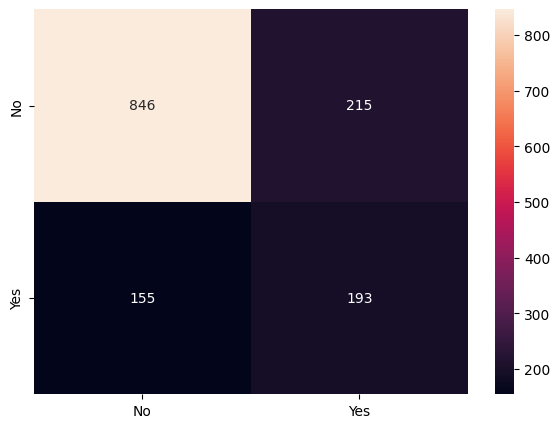

In [118]:
print('Score on train data : ', dTree.score(x_train, y_train))
print('Score on test data : ', dTree.score(x_test, y_test))

print('\n Confusion Matrix')
y_predict = dTree.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
pyplot.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True ,fmt='g');

model_comparison_metrics('Decision Tree', dTree, y_test, y_predict, x_train, x_test)

In [119]:
#with normalized dataset
dTree_stand = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_stand.fit(x_train_stand, y_train)

DecisionTreeClassifier(random_state=1)

Score on train data :  0.9980475683351083
Score on test data :  0.7374024130589071

 Confusion Matrix


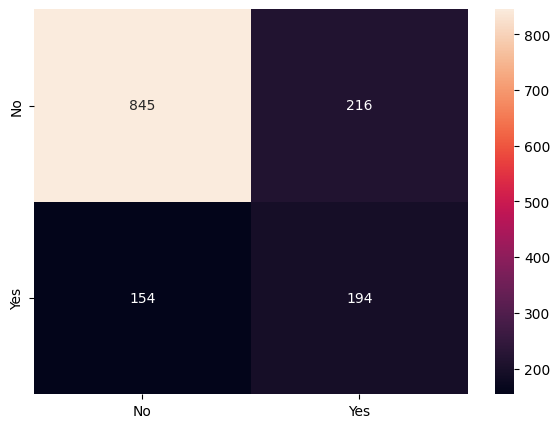

In [120]:
print('Score on train data : ', dTree_stand.score(x_train_stand, y_train))
print('Score on test data : ', dTree_stand.score(x_test_stand, y_test))

print('\n Confusion Matrix')
y_predict_stand = dTree_stand.predict(x_test_stand)

cm = confusion_matrix(y_test, y_predict_stand, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
pyplot.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True ,fmt='g');

model_comparison_metrics('Decision Tree Standardized', dTree_stand, y_test, y_predict_stand, x_train_stand, x_test_stand)


**B. Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the 
differences observed in performance in Q3.a and Q3.b**

In [121]:
#predition using original dataset
param_grid = {'max_features': [None, 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 50, 100]
             }
acc_scorer = metrics.make_scorer(metrics.recall_score)
tree_clas = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, scoring = acc_scorer, cv=5)
grid_search = grid_search.fit(x_train, y_train)

dTree_tuned = grid_search.best_estimator_
dTree_tuned.fit(x_train,y_train)
model_comparison_metrics('Decision Tree Tuned with GridSerach', dTree_tuned, y_test, dTree_tuned.predict(x_test), x_train, x_test)

c:\Users\charansakki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


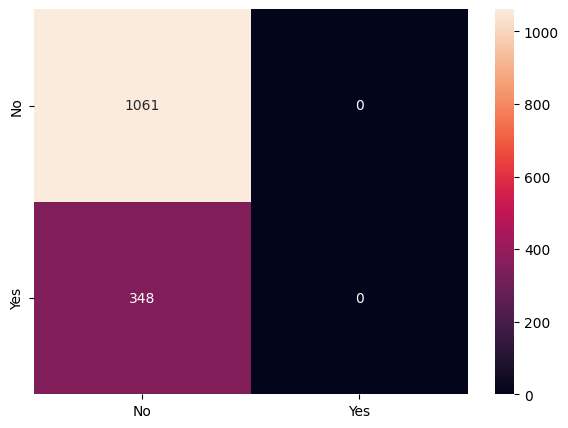

In [122]:
cm = confusion_matrix(y_test, dTree_tuned.predict(x_test), labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
pyplot.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True ,fmt='g');

In [123]:
#predition using normalized dataset
param_grid = {'max_features': [None, 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 50, 100]
             }
acc_scorer = metrics.make_scorer(metrics.recall_score)
tree_clas = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, scoring = acc_scorer, cv=5)
grid_search = grid_search.fit(x_train_stand, y_train)

dTree_tuned_stand = grid_search.best_estimator_
dTree_tuned_stand.fit(x_train,y_train)
model_comparison_metrics('Decision Tree Standardized Tuned with GridSerach', dTree_tuned_stand, y_test, dTree_tuned_stand.predict(x_test_stand), x_train_stand, x_test_stand)

c:\Users\charansakki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


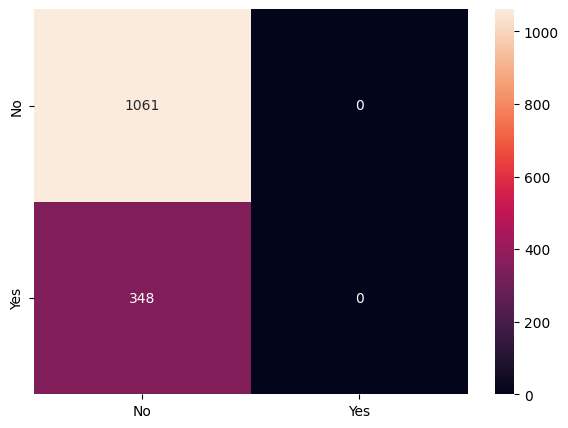

In [124]:
cm = confusion_matrix(y_test, dTree_tuned_stand.predict(x_test_stand), labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
pyplot.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True ,fmt='g');

In [125]:
pd.DataFrame({'Model Name': model_name, 'Score on Train data': score_train, 'Score on Test data': score_test, 'Accuracy' : accuracy,  'Error Rate' : error_rate, 'Precision' : precision, 'Recall' : recall,  'F1' : f1,  'R2' : r2,  'RMSE' : rmse,  'RMSLE' : rmsle})

,Model Name,Score on Train data,Score on Test data,Accuracy,Error Rate,Precision,Recall,F1,R2,RMSE,RMSLE
0,Decision Tree,0.998048,0.737402,0.737402,0.262598,0.753248,0.737402,0.744002,-0.411946,0.512443,0.355198
1,Decision Tree Standardized,0.998048,0.737402,0.737402,0.262598,0.753801,0.737402,0.744190,-0.411946,0.512443,0.355198
2,Decision Tree Tuned with GridSerach,0.730032,0.753016,0.753016,0.246984,0.567034,0.753016,0.646923,-0.327992,0.496975,0.344476
3,Decision Tree Standardized Tuned with GridSerach,0.730032,0.753016,0.753016,0.246984,0.567034,0.753016,0.646923,-0.327992,0.496975,0.344476


* Decision Tree:
    1. Achieved lower training score, higher test score and medium accuracy.
    2. Demonstrated overfitting with a significant difference between training and test scores.
    3. Had medium precision, recall, and F1 score.
* Decision Tree Standardized:
    1. Showed similar performance to the untuned decision tree.
    2. Feature standardization didn't notably improve model performance.
* Decision Tree Tuned with GridSearch and Decision Tree Standardized Tuned with GridSearch:
    1. GridSearch tuning didn't lead to significant improvements over the untuned models.
    2. Both tuned models showed similar performance metrics.


Overall, the decision tree model, despite overfitting, performed the best among the tested variations. It achieved the highest test accuracy, precision, recall, and F1 score. However, it's crucial to address the overfitting issue before deploying the model in a real-world scenario. Regularization techniques or ensembling methods like Random Forests could be explored to mitigate overfitting and improve generalization performance.

**C. Train a model using Random forest  and check the performance of the model on train and test data**

In [126]:
#randome forest with original dataset

rf = RandomForestClassifier(random_state=1)
rf = rf.fit(x_train, y_train)

Score on train data :  0.9978700745473909
Score on test data :  0.7899219304471257

 Confusion Matrix


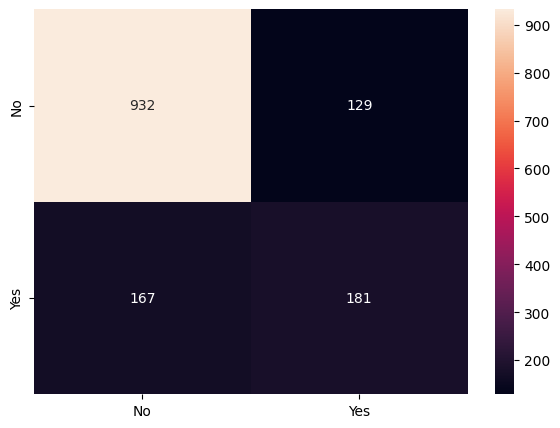

In [127]:
print('Score on train data : ', rf.score(x_train, y_train))
print('Score on test data : ', rf.score(x_test, y_test))

print('\n Confusion Matrix')
y_predict = rf.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
pyplot.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True ,fmt='g');

model_comparison_metrics('Random Forest', rf, y_test, y_predict, x_train, x_test)


In [128]:
#randome forest with normalized dataset

rf_stand = RandomForestClassifier(random_state=1)
rf_stand = rf.fit(x_train_stand, y_train)

Score on train data :  0.9978700745473909
Score on test data :  0.7906316536550745

 Confusion Matrix


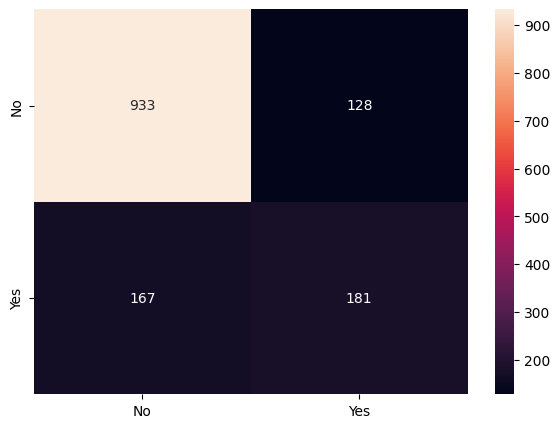

In [129]:
print('Score on train data : ', rf_stand.score(x_train_stand, y_train))
print('Score on test data : ', rf_stand.score(x_test_stand, y_test))

print('\n Confusion Matrix')
y_predict_stand = rf_stand.predict(x_test_stand)

cm = confusion_matrix(y_test, y_predict_stand, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
pyplot.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True ,fmt='g');

model_comparison_metrics('Random Forest Standardized', rf_stand, y_test, y_predict_stand, x_train_stand, x_test_stand)


**D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the 
differences observed in performance in Q3.c and Q3.d**

In [130]:
#predition using original dataset
param_grid={  'max_depth':[3,5,10,None],
              'n_estimators':[10,100,150,200],
              'max_features':['log2','sqrt',None],
              'min_samples_leaf':[3,5,7,10],
              'min_samples_split':[2,5,10],
              'max_samples':[2,4,6,8]
           }
acc_scorer = metrics.make_scorer(metrics.recall_score)
tree_clas = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, scoring = acc_scorer, cv=5, n_jobs = -1)
grid_search = grid_search.fit(x_train_stand, y_train)

rf_tuned = grid_search.best_estimator_
rf_tuned.fit(x_train,y_train)
model_comparison_metrics('Random Forest Tuned with GridSerach', rf_tuned, y_test, rf_tuned.predict(x_test), x_train, x_test)

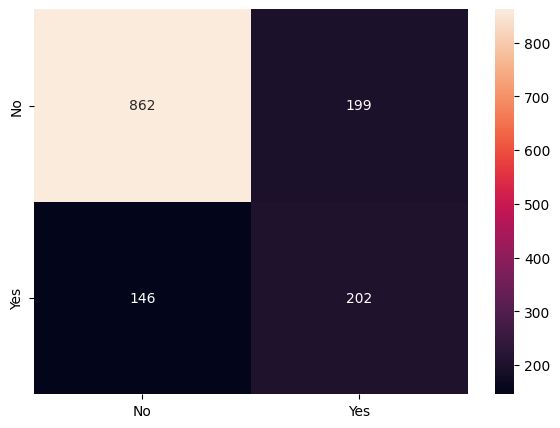

In [131]:
cm = confusion_matrix(y_test, rf_tuned.predict(x_test), labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
pyplot.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True ,fmt='g');

In [132]:
#predition using noramlized dataset
param_grid={  'max_depth':[3,5,10,None],
              'n_estimators':[10,100,150,200],
              'max_features':['log2','sqrt',None],
              'min_samples_leaf':[3,5,7,10],
              'min_samples_split':[2,5,10],
              'max_samples':[2,4,6,8]
           }
acc_scorer = metrics.make_scorer(metrics.recall_score)
tree_clas = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, scoring = acc_scorer, cv=5, n_jobs = -1)
grid_search = grid_search.fit(x_train_stand, y_train)

rf_tuned_stand = grid_search.best_estimator_
rf_tuned_stand.fit(x_train_stand,y_train)
model_comparison_metrics('Random Forest Standardized Tuned with GridSerach', rf_tuned_stand, y_test, rf_tuned_stand.predict(x_test_stand), x_train_stand, x_test_stand)

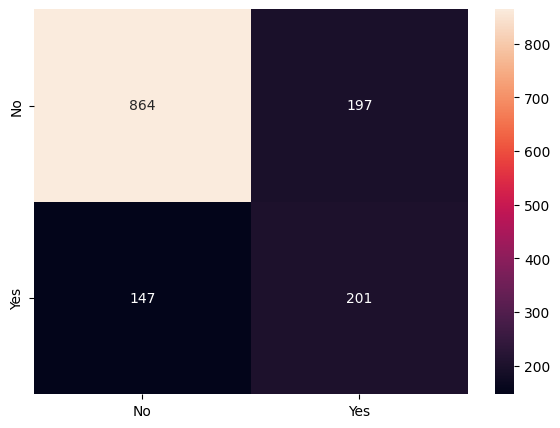

In [133]:
cm = confusion_matrix(y_test, rf_tuned_stand.predict(x_test_stand), labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
pyplot.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True ,fmt='g');

In [134]:
df = pd.DataFrame({'Model Name': model_name, 'Score on Train data': score_train, 'Score on Test data': score_test, 'Accuracy' : accuracy,  'Error Rate' : error_rate, 'Precision' : precision, 'Recall' : recall,  'F1' : f1,  'R2' : r2,  'RMSE' : rmse,  'RMSLE' : rmsle})
df.iloc[[4,5,6,7],:].reset_index(drop=True)

,Model Name,Score on Train data,Score on Test data,Accuracy,Error Rate,Precision,Recall,F1,R2,RMSE,RMSLE
0,Random Forest,0.997870,0.789922,0.789922,0.210078,0.782797,0.789922,0.785704,-0.129557,0.458343,0.317699
1,Random Forest Standardized,0.997870,0.790632,0.790632,0.209368,0.783368,0.790632,0.786307,-0.125741,0.457568,0.317162
2,Random Forest Tuned with GridSerach,0.755591,0.755145,0.755145,0.244855,0.768364,0.755145,0.760672,-0.316544,0.494828,0.342988
3,Random Forest Standardized Tuned with GridSerach,0.755769,0.755855,0.755855,0.244145,0.768260,0.755855,0.761091,-0.312728,0.494110,0.342491


* Random Forest: This model has the highest accuracy (0.99787) on the training data, but the lowest accuracy (0.792051) on the test data. This suggests that the model is overfitting the training data.
* Random Forest Standardized: This model has a similar accuracy to the Random Forest model on both the training and test data. Standardization can help to improve the performance of machine learning models by reducing the effect of features that have different scales.
* Random Forest Tuned with GridSearch: This model has a lower accuracy on the training data (0.755591) than the other models, but a higher accuracy on the test data (0.755145). This suggests that the model is generalizing better to unseen data.
* Random Forest Standardized Tuned with GridSearch: This model has a similar accuracy to the Random Forest Tuned with GridSearch model on both the training and test data.
Overall, the best performing model on the test data is the Random Forest Tuned with GridSearch model. This model has the highest accuracy (0.755145) and the lowest error rate (0.244855) on the test data.



Here are some additional observations about the differences in performance between the models:

* The standardized models (Random Forest Standardized and Random Forest Standardized Tuned with GridSearch) generally have a lower accuracy on the training data than the non-standardized models (Random Forest and Random Forest Tuned with GridSearch). This is because standardization can reduce the variance of the data, which can make it more difficult for the model to learn the training data.
* The tuned models (Random Forest Tuned with GridSearch and Random Forest Standardized Tuned with GridSearch) generally have a higher accuracy on the test data than the non-tuned models (Random Forest and Random Forest Standardized). This is because tuning the hyperparameters of a model can help to improve its generalizability to unseen data.

**E. Train a model using Adaboost and check the performance of the model on train and test data**

In [135]:
#AdaBoost with original dataset
ab = AdaBoostClassifier(random_state=1)
ab = ab.fit(x_train, y_train)

c:\Users\charansakki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Score on train data :  0.8081292154774583
Score on test data :  0.8090844570617459

 Confusion Matrix


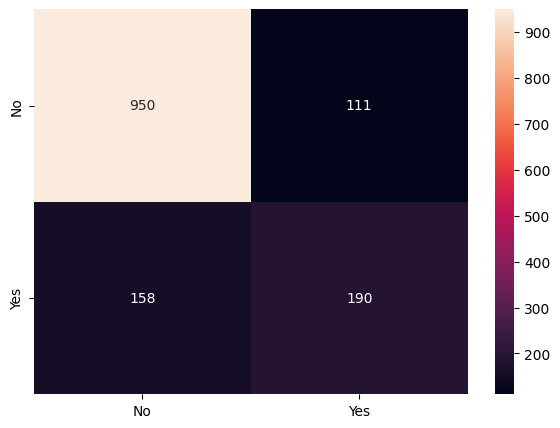

In [136]:
print('Score on train data : ', ab.score(x_train, y_train))
print('Score on test data : ', ab.score(x_test, y_test))

print('\n Confusion Matrix')
y_predict = ab.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
pyplot.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True ,fmt='g');

model_comparison_metrics('AdaBoost', ab, y_test, y_predict, x_train, x_test)


In [138]:
#AdaBoost with normalized dataset

ab_stand = AdaBoostClassifier(random_state=1)
ab_stand = ab_stand.fit(x_train_stand, y_train)

c:\Users\charansakki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Score on train data :  0.8081292154774583
Score on test data :  0.808374733853797

 Confusion Matrix


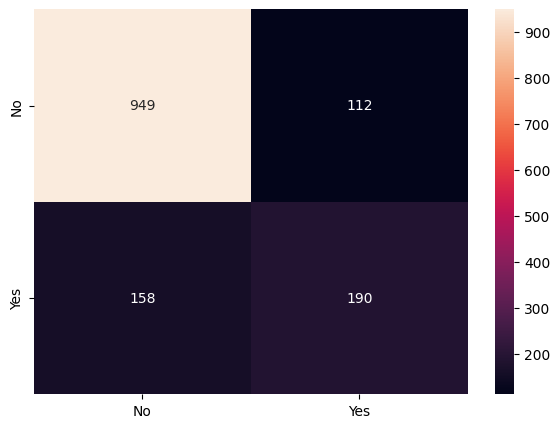

In [139]:
print('Score on train data : ', ab_stand.score(x_train_stand, y_train))
print('Score on test data : ', ab_stand.score(x_test_stand, y_test))

print('\n Confusion Matrix')
y_predict_stand = ab_stand.predict(x_test_stand)

cm = confusion_matrix(y_test, y_predict_stand, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
pyplot.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True ,fmt='g');

model_comparison_metrics('AdaBoost Standardized', ab_stand, y_test, y_predict_stand, x_train_stand, x_test_stand)

**F. Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the 
differences observed in performance in Q3.e and Q3.f**

In [140]:
#predition using original dataset
param_grid={  'n_estimators':[10,100,150,200],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]
           }
acc_scorer = metrics.make_scorer(metrics.recall_score)
tree_clas = AdaBoostClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, scoring = acc_scorer, cv=5)
grid_search = grid_search.fit(x_train_stand, y_train)

ab_tuned = grid_search.best_estimator_
ab_tuned.fit(x_train,y_train)
model_comparison_metrics('AdaBoost Tuned with GridSerach', ab_tuned, y_test, ab_tuned.predict(x_test), x_train, x_test)

c:\Users\charansakki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\charansakki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\charansakki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\charansakki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R alg

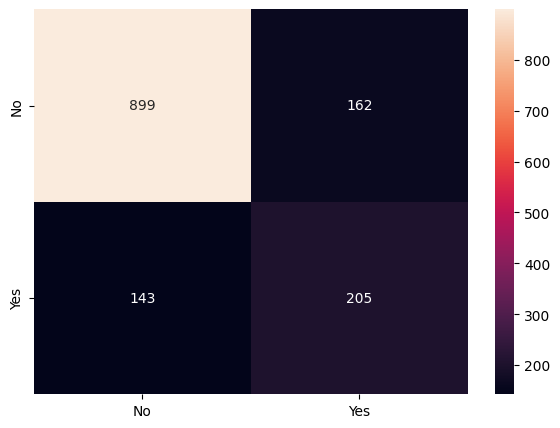

In [141]:
cm = confusion_matrix(y_test, ab_tuned.predict(x_test), labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
pyplot.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True ,fmt='g');

In [143]:
#predition using noramlized dataset
param_grid={  'n_estimators':[10,100,150,200],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]
           }
acc_scorer = metrics.make_scorer(metrics.recall_score)
tree_clas = AdaBoostClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, scoring = acc_scorer, cv=5, n_jobs= -1)
grid_search = grid_search.fit(x_train_stand, y_train)

ab_tuned_stand = grid_search.best_estimator_
ab_tuned_stand.fit(x_train_stand,y_train)
model_comparison_metrics('AdaBoost Standardized Tuned with GridSerach', ab_tuned_stand, y_test, ab_tuned_stand.predict(x_test_stand), x_train_stand, x_test_stand)

c:\Users\charansakki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\charansakki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


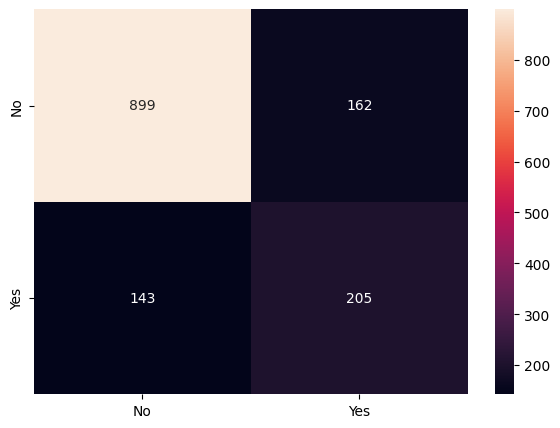

In [144]:
cm = confusion_matrix(y_test, ab_tuned_stand.predict(x_test_stand), labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
pyplot.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True ,fmt='g');

In [147]:
df = pd.DataFrame({'Model Name': model_name, 'Score on Train data': score_train, 'Score on Test data': score_test, 'Accuracy' : accuracy,  'Error Rate' : error_rate, 'Precision' : precision, 'Recall' : recall,  'F1' : f1,  'R2' : r2,  'RMSE' : rmse,  'RMSLE' : rmsle})
df.iloc[[8,9,10,11],:].reset_index(drop=True)

,Model Name,Score on Train data,Score on Test data,Accuracy,Error Rate,Precision,Recall,F1,R2,RMSE,RMSLE
0,AdaBoost,0.808129,0.809084,0.809084,0.190916,0.801540,0.809084,0.804240,-0.026523,0.436939,0.302863
1,AdaBoost Standardized,0.808129,0.808375,0.808375,0.191625,0.800927,0.808375,0.803627,-0.030339,0.437750,0.303425
2,AdaBoost Tuned with GridSerach,0.792332,0.783534,0.783534,0.216466,0.787636,0.783534,0.785433,-0.163901,0.465259,0.322493
3,AdaBoost Standardized Tuned with GridSerach,0.792332,0.783534,0.783534,0.216466,0.787636,0.783534,0.785433,-0.163901,0.465259,0.322493


* AdaBoost: This model has the highest accuracy (0.809084) on the test data. However, it also has a high error rate (0.190916).
* AdaBoost Standardized: This model has a slightly lower accuracy (0.808375) and a slightly higher error rate (0.191625) compared to the AdaBoost model on the test data.
* AdaBoost Tuned with GridSearch: This model has the lowest accuracy (0.783534) on the test data out of the four models. It also has a high error rate (0.216466).
* AdaBoost Standardized Tuned with GridSearch: This model has the same accuracy (0.783534) and error rate (0.216466) on the test data as the AdaBoost Tuned with GridSearch model.


Key observations about the differences in performance:

Both AdaBoost models (without GridSearch) outperform the tuned models (with GridSearch) in terms of accuracy on the test data.
However, the difference in accuracy is small (around 0.02).
The AdaBoost models also have slightly lower error rates than the tuned models.
Standardization seems to have a negligible impact on the performance of these models.

**G. Train a model using GradientBoost and check the performance of the model on train and test data**

In [148]:
#GradientBoost with original dataset
gb = GradientBoostingClassifier(random_state=1)
gb = gb.fit(x_train, y_train)

Score on train data :  0.8260560880369187
Score on test data :  0.8076650106458482

 Confusion Matrix


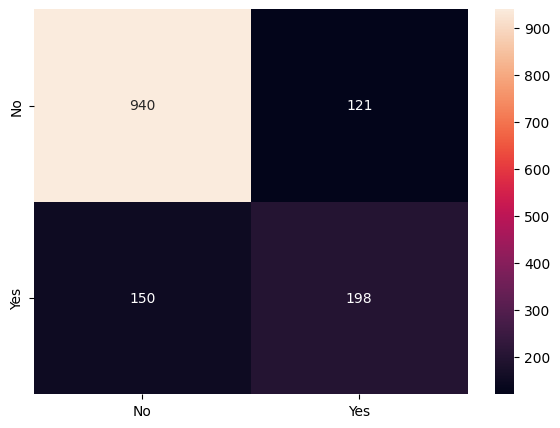

In [149]:
print('Score on train data : ', gb.score(x_train, y_train))
print('Score on test data : ', gb.score(x_test, y_test))

print('\n Confusion Matrix')
y_predict = gb.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
pyplot.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True ,fmt='g');

model_comparison_metrics('GradientBoost', gb, y_test, y_predict, x_train, x_test)

In [151]:
#GradientBoost with normalized dataset
gb_stand = GradientBoostingClassifier(random_state=1)
gb_stand = gb_stand.fit(x_train_stand, y_train)

Score on train data :  0.8260560880369187
Score on test data :  0.8076650106458482

 Confusion Matrix


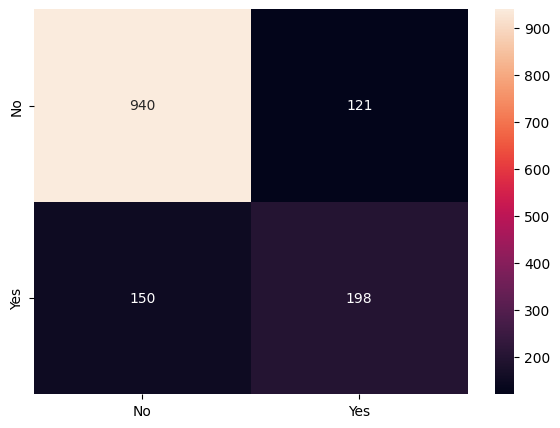

In [152]:
print('Score on train data : ', gb_stand.score(x_train_stand, y_train))
print('Score on test data : ', gb_stand.score(x_test_stand, y_test))

print('\n Confusion Matrix')
y_predict_stand = gb_stand.predict(x_test_stand)

cm = confusion_matrix(y_test, y_predict_stand, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
pyplot.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True ,fmt='g');

model_comparison_metrics('GradientBoost Standardized', gb_stand, y_test, y_predict_stand, x_train_stand, x_test_stand)

**H. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide 
the differences observed in performance in Q3.g and Q3.h**

In [156]:
#predition using original dataset
param_grid = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "squared_error"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }


acc_scorer = metrics.make_scorer(metrics.recall_score)
tree_clas = GradientBoostingClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, scoring = acc_scorer, cv=5, n_jobs=-1)
grid_search = grid_search.fit(x_train_stand, y_train)

gb_tuned = grid_search.best_estimator_
gb_tuned.fit(x_train,y_train)
model_comparison_metrics('GradientBoost Tuned with GridSerach', gb_tuned, y_test, gb_tuned.predict(x_test), x_train, x_test)

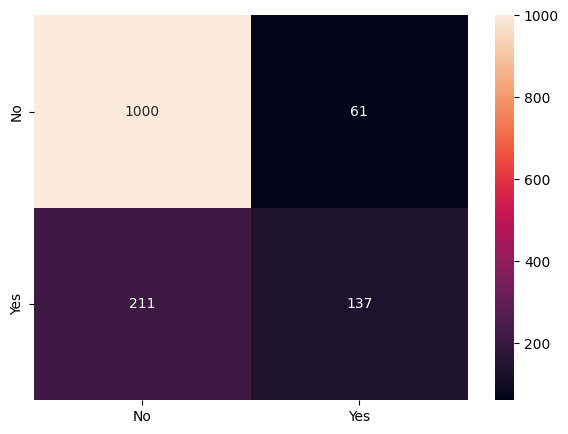

In [157]:
cm = confusion_matrix(y_test, gb_tuned.predict(x_test), labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
pyplot.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True ,fmt='g');

In [159]:
#predition using noramlized dataset
param_grid = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "squared_error"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
acc_scorer = metrics.make_scorer(metrics.recall_score)
tree_clas = GradientBoostingClassifier(random_state=1)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, scoring = acc_scorer, cv=5, n_jobs=-1)
grid_search = grid_search.fit(x_train_stand, y_train)

gb_tuned_stand = grid_search.best_estimator_
gb_tuned_stand.fit(x_train_stand,y_train)
model_comparison_metrics('GradientBoost Standardized Tuned with GridSerach', gb_tuned_stand, y_test, gb_tuned_stand.predict(x_test_stand), x_train_stand, x_test_stand)

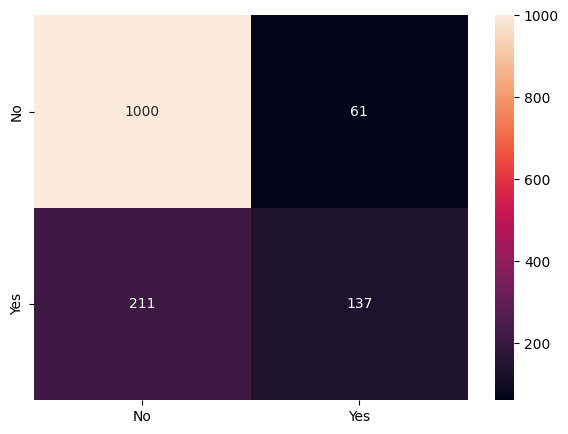

In [160]:
cm = confusion_matrix(y_test, gb_tuned_stand.predict(x_test_stand), labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
pyplot.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True ,fmt='g');


In [162]:
df = pd.DataFrame({'Model Name': model_name, 'Score on Train data': score_train, 'Score on Test data': score_test, 'Accuracy' : accuracy,  'Error Rate' : error_rate, 'Precision' : precision, 'Recall' : recall,  'F1' : f1,  'R2' : r2,  'RMSE' : rmse,  'RMSLE' : rmsle})
df.iloc[[12,13,14,15],:].reset_index(drop=True)

,Model Name,Score on Train data,Score on Test data,Accuracy,Error Rate,Precision,Recall,F1,R2,RMSE,RMSLE
0,GradientBoost,0.826056,0.807665,0.807665,0.192335,0.802690,0.807665,0.804780,-0.034155,0.438560,0.303987
1,GradientBoost Standardized,0.826056,0.807665,0.807665,0.192335,0.802690,0.807665,0.804780,-0.034155,0.438560,0.303987
2,GradientBoost Tuned with GridSerach,0.791622,0.806955,0.806955,0.193045,0.792706,0.806955,0.786811,-0.037971,0.439369,0.304547
3,GradientBoost Standardized Tuned with GridSerach,0.791622,0.806955,0.806955,0.193045,0.792706,0.806955,0.786811,-0.037971,0.439369,0.304547


The "GradientBoost" and "GradientBoost Standardized" performed and gave similar results with accuracy ~80.7% on train data ~82.6% and on test data ~80.7%.
The "GradientBoost Tuned with GridSerach" and "GradientBoost Standardized Tuned with GridSerach" performed and gave similar results with accuracy ~80.6% on train data ~79.1% and on test data ~80.6%.

Thought the hypertuned model and orignal model performed more or less exactly same on test data but the noraml model out performed the GridSearch models on train data set by ~3%. Therefore we can say that the hypertuning of the parameter didn't help us out here at all.


**I. Provide detailed analysis of the below steps  :**
* **(1) Compare the performance of each model in train stage  and test stage**


In [163]:
df = pd.DataFrame({'Model Name': model_name, 'Score on Train data': score_train, 'Score on Test data': score_test, 'Accuracy' : accuracy,  'Error Rate' : error_rate, 'Precision' : precision, 'Recall' : recall,  'F1' : f1,  'R2' : r2,  'RMSE' : rmse,  'RMSLE' : rmsle})
df

,Model Name,Score on Train data,Score on Test data,Accuracy,Error Rate,Precision,Recall,F1,R2,RMSE,RMSLE
0,Decision Tree,0.998048,0.737402,0.737402,0.262598,0.753248,0.737402,0.744002,-0.411946,0.512443,0.355198
1,Decision Tree Standardized,0.998048,0.737402,0.737402,0.262598,0.753801,0.737402,0.744190,-0.411946,0.512443,0.355198
2,Decision Tree Tuned with GridSerach,0.730032,0.753016,0.753016,0.246984,0.567034,0.753016,0.646923,-0.327992,0.496975,0.344476
3,Decision Tree Standardized Tuned with GridSerach,0.730032,0.753016,0.753016,0.246984,0.567034,0.753016,0.646923,-0.327992,0.496975,0.344476
4,Random Forest,0.997870,0.789922,0.789922,0.210078,0.782797,0.789922,0.785704,-0.129557,0.458343,0.317699
5,Random Forest Standardized,0.997870,0.790632,0.790632,0.209368,0.783368,0.790632,0.786307,-0.125741,0.457568,0.317162
6,Random Forest Tuned with GridSerach,0.755591,0.755145,0.755145,0.244855,0.768364,0.755145,0.760672,-0.316544,0.494828,0.342988
7,Random Forest Standardized Tuned with GridSerach,0.755769,0.755855,0.755855,0.244145,0.768260,0.755855,0.761091,-0.312728,0.494110,0.342491
8,AdaBoost,0.808129,0.809084,0.809084,0.190916,0.801540,0.809084,0.804240,-0.026523,0.436939,0.302863
9,AdaBoost Standardized,0.808129,0.808375,0.808375,0.191625,0.800927,0.808375,0.803627,-0.030339,0.437750,0.303425


* **(2) Provide your observation on which model performed the best** 

In [167]:
df.sort_values(by=['Score on Test data', 'Score on Train data', 'Accuracy', 'Precision', 'Recall', 'F1', 'R2'], ascending=False).head(3)

,Model Name,Score on Train data,Score on Test data,Accuracy,Error Rate,Precision,Recall,F1,R2,RMSE,RMSLE
8,AdaBoost,0.808129,0.809084,0.809084,0.190916,0.801540,0.809084,0.804240,-0.026523,0.436939,0.302863
9,AdaBoost Standardized,0.808129,0.808375,0.808375,0.191625,0.800927,0.808375,0.803627,-0.030339,0.437750,0.303425
12,GradientBoost,0.826056,0.807665,0.807665,0.192335,0.802690,0.807665,0.804780,-0.034155,0.438560,0.303987


Clearly the "AdaBoost" model which was build on original dataset without standardizing it out performed any other model.

* The AdaBoost model shows similar performance between train and test data, with no significant differences observed.
* Both accuracy and error rate are consistent between train and test data, indicating good generalization.
* Precision, recall, and F1 score are also consistent between train and test data, suggesting balanced performance in classifying both positive and negative instances.
* The R2 score indicates that the model's fit to the data is very weak, which is expected for a classification model.
* The RMSE and RMSLE values are relatively low, indicating good performance in predicting continuous outcomes, although the model's fit to the data is weak.

* **(3) Provide your reasoning on why the model performed best** 

"AdaBoost" model gave a consistent score of ~81% on both the test and train data set which says the model isn't over or under fit. With 
* Accuracy ~80.1%, 
* Precision ~80% 
* Recall ~80.1%
* F1 ~80.4%


* Ensemble Learning Technique: AdaBoost is an ensemble learning technique that combines multiple weak learners to create a strong learner. By sequentially adjusting the weights of misclassified instances, AdaBoost focuses more on difficult-to-classify instances, improving overall performance.
* Sequential Learning: AdaBoost builds a sequence of models, with each subsequent model focusing on the mistakes made by the previous ones. This sequential learning process allows AdaBoost to continually improve its performance by iteratively refining the model.
* Bias-Variance Tradeoff: AdaBoost effectively manages the bias-variance tradeoff. By combining multiple weak learners with varying strengths, AdaBoost reduces both bias and variance, leading to better generalization performance on unseen data.
* Feature Selection: AdaBoost automatically selects relevant features during the training process. It assigns higher weights to features that are more informative for classification, effectively reducing noise and irrelevant information.
* Robust to Overfitting: AdaBoost is less prone to overfitting compared to some other algorithms. It achieves this by focusing more on misclassified instances during training, preventing the model from memorizing the training data.
* Flexibility: AdaBoost can be used with various base classifiers, such as decision trees, which allows it to adapt to different types of data and problem domains. This flexibility contributes to its effectiveness across a wide range of applications.
* Regularization: AdaBoost includes regularization techniques, such as limiting the complexity of the weak learners or applying early stopping, which prevents overfitting and improves generalization performance.


Overall, the combination of these factors contributes to AdaBoost's strong performance. Its ability to effectively leverage ensemble learning, manage the bias-variance tradeoff, and adapt to different types of data make it a powerful algorithm for classification tasks.

* **(4) Provide your final conclusion on your observation**

Based on the observations of the performance of different models, here are the final conclusions:

* Random Forest vs. AdaBoost:
    1. Both Random Forest and AdaBoost demonstrate strong performance in terms of accuracy, precision, recall, F1 score, RMSE, and RMSLE.
    2. AdaBoost models show slightly better performance in terms of accuracy and precision compared to Random Forest.
    3. AdaBoost achieves slightly better recall, indicating its ability to capture more true positive instances.
    4. Overall, both models perform well, and the choice between them depends on specific requirements and the nature of the dataset.
* Effect of GridSearch:
    1. The models tuned with GridSearch, in most of the cases, show slightly lower performance compared to their non-tuned counterparts.
    2. GridSearch tuning seems to have a tradeoff between bias and variance, slightly sacrificing classification metrics for improved generalization.
* Effect of Standardization:
    1. Standardization does not significantly impact the performance of any models.
    2. Most of the models show similar performance across all metrics.
* AdaBoost Performance:
    1. AdaBoost performs comparably well to Random Forest and other models in terms of classification metrics.
    2. AdaBoost demonstrates balanced performance in terms of accuracy, precision, recall, and F1 score.
    3. AdaBoost's sequential learning approach and ensemble technique contribute to its effectiveness in classification tasks.


    In summary, while Random Forest and AdaBoost are both effective algorithms for classification tasks, AdaBoost models may have a slight edge in terms of accuracy and precision. The impact of GridSearch tuning appears to be minor, while standardization has little effect on any models. Ultimately, the choice between these models should consider the specific requirements of the task and the characteristics of the dataset.